<a href="https://colab.research.google.com/github/manonlt/Deforestation-/blob/main/Stacked_barchart_with_Pandas%2C_Matplotlib_%26_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Retraitement base

Le dataframe est issu du site Global Forest Watch. Il présente la perte annuelle de la couverture forestière mondiale, causée par un facteur dominant. 









In [39]:
df = pd.read_csv('/content/treecover_loss__ha.csv')
df = df[['umd_tree_cover_loss__year', 'umd_tree_cover_loss__ha', 'tsc_tree_cover_loss_drivers__type']]
df

,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,tsc_tree_cover_loss_drivers__type
0,2017,7.962372e+06,Shifting agriculture
1,2012,3.891974e+06,Shifting agriculture
2,2014,5.881218e+06,Shifting agriculture
3,2016,7.439296e+06,Shifting agriculture
4,2009,3.697391e+06,Shifting agriculture
...,...,...,...
109,2013,1.341745e+05,Urbanization
110,2018,1.921324e+05,Urbanization
111,2003,1.534496e+05,Urbanization
112,2019,1.734462e+05,Urbanization


In [41]:
df.rename(columns={'umd_tree_cover_loss__year' : 'Année', 'umd_tree_cover_loss__ha': 'Surface forestière perdue (Mha)', 'tsc_tree_cover_loss_drivers__type': 'Causes'}, inplace = True)
df['Causes'].replace(['Urbanization', 'Forestry', 'Unknown', 'Commodity driven deforestation', 'Shifting agriculture', 'Wildfire'], ['Urbanisation', 'Sylviculture', 'Inconnu', 'Culture des produits de base', 'Agriculture itinérante', 'Feu de forêt'], inplace=True)
df['Surface forestière perdue (Mha)'] = round(df['Surface forestière perdue (Mha)'] / 1000000, 2)   #Pour plus de lisibilité, je transforme les hectares en millions d'hectares
df

,Année,Surface forestière perdue (Mha),Causes
0,2017,7.96,Agriculture itinérante
1,2012,3.89,Agriculture itinérante
2,2014,5.88,Agriculture itinérante
3,2016,7.44,Agriculture itinérante
4,2009,3.70,Agriculture itinérante
...,...,...,...
109,2013,0.13,Urbanisation
110,2018,0.19,Urbanisation
111,2003,0.15,Urbanisation
112,2019,0.17,Urbanisation


In [43]:
#Total de la surface perdue par année et par cause
df_pivot = df.pivot_table(index = 'Année', columns= 'Causes', values='Surface forestière perdue (Mha)', aggfunc='sum') 
df_pivot

Causes,Agriculture itinérante,Culture des produits de base,Feu de forêt,Inconnu,Sylviculture,Urbanisation
Année,,,,,,
2001,2.78,3.40,2.15,0.19,4.63,0.19
2002,2.91,4.30,4.14,0.16,4.78,0.17
2003,2.21,3.95,3.83,0.11,4.23,0.15
2004,2.55,5.61,5.04,0.18,6.30,0.22
2005,3.08,5.13,3.51,0.15,6.01,0.22
2006,2.93,4.58,3.79,0.16,5.96,0.23
2007,3.37,4.91,3.46,0.17,6.27,0.22
2008,3.31,4.86,3.88,0.17,6.20,0.19
2009,3.70,5.02,2.50,0.18,5.45,0.14


##Visualisation #1 : Pandas

In [44]:
colours = {"Feu de forêt": "indianred", "Agriculture itinérante": "red", 'Sylviculture' : 'coral', 'Urbanisation': 'black', 'Culture des produits de base': 'tan', 'Inconnu': 'orange'}

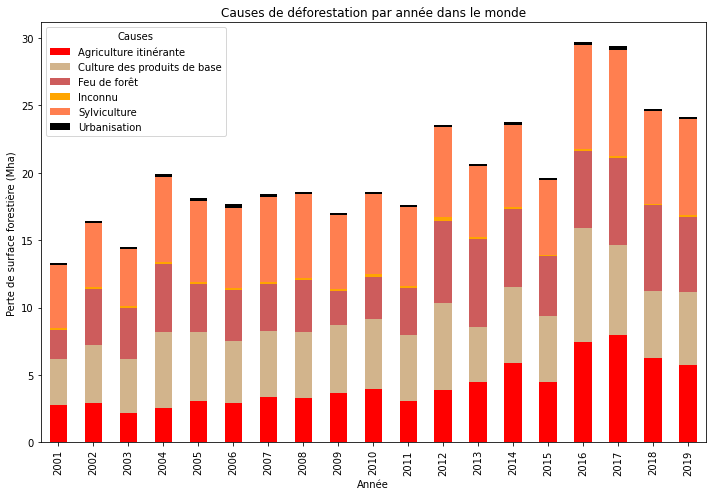

In [45]:
df_pivot.plot(kind="bar", stacked=True, color=colours, figsize=(10,7))
plt.title('Causes de déforestation par année dans le monde')
plt.xlabel('Année')
plt.ylabel('Perte de surface forestière (Mha)')
plt.tight_layout()
plt.show()

#Visualisation #2 : Matplotlib

In [46]:
#Création de mes x DataFrame intermédiaires en fonction de la cause de déforestation

N = df['Année'].unique()
agit = df.loc[df['Causes'] == 'Agriculture itinérante'].sort_values(by='Année')['Surface forestière perdue (Mha)'].reset_index(drop=True)
cult = df.loc[df['Causes'] == 'Culture des produits de base'].sort_values(by='Année')['Surface forestière perdue (Mha)'].reset_index(drop=True)
feu = df.loc[df['Causes'] == 'Feu de forêt'].sort_values(by='Année')['Surface forestière perdue (Mha)'].reset_index(drop=True)
inc = df.loc[df['Causes'] == 'Inconnu'].sort_values(by='Année')['Surface forestière perdue (Mha)'].reset_index(drop=True)
syl = df.loc[df['Causes'] == 'Sylviculture'].sort_values(by='Année')['Surface forestière perdue (Mha)'].reset_index(drop=True)
urb = df.loc[df['Causes'] == 'Urbanisation'].sort_values(by='Année')['Surface forestière perdue (Mha)'].reset_index(drop=True)


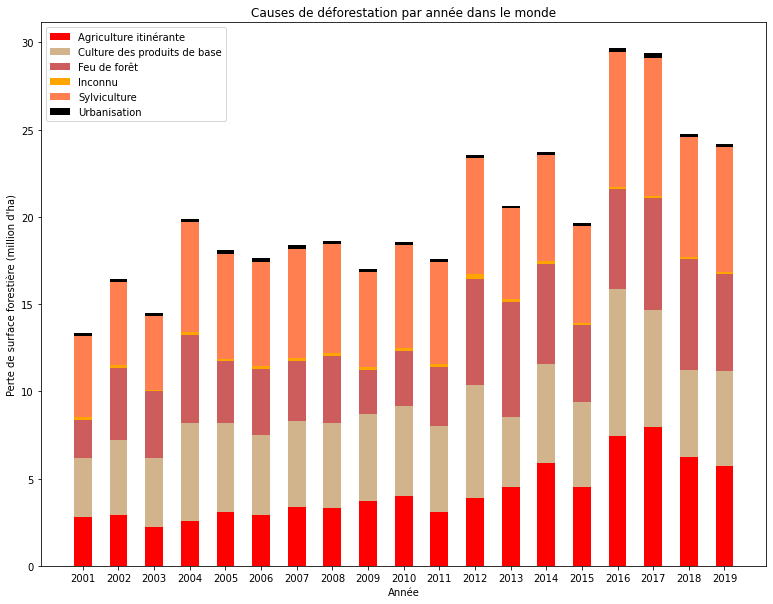

In [49]:
#Matplotlib

col = ('red', 'tan', 'indianred', 'orange', 'coral', 'black')
data = (agit, cult, feu, inc, syl, urb)
  
width = 0.5
ind = np.arange(2001,2020,1)
bottom = 0

plt.figure(figsize=(13,10)) 

for i, j in zip(data, col):
  plt.bar(ind, i, width, bottom=bottom, color=j)
  bottom += i

plt.ylabel('Perte de surface forestière (million d\'ha)')
plt.title('Causes de déforestation par année dans le monde')
plt.xticks(ind)
plt.xlabel('Année')
plt.legend(('Agriculture itinérante', 'Culture des produits de base', 'Feu de forêt', 'Inconnu', 'Sylviculture', 'Urbanisation'))

plt.show()

##Visualisation #3 : Plotly

In [58]:
fig = px.bar(df, x='Année', y='Surface forestière perdue (Mha)', color='Causes', color_discrete_map={
                "Agriculture itinérante": "brown",
                "Culture des produits de base": "tan",
                "Feu de forêt": "indianred",
                "Inconnu": "orange",
                "Sylviculture": "coral",
                "Urbanisation": "black"})

fig.update_layout(
    title="Causes de déforestation",
    title_x=0.5,
    yaxis_title="Perte de surface forestière (hectare)",
    legend_orientation="h",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"))

for i in fig.data:
  i.name = i.name.split('=')[1] 

fig.show()